In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.datasets import fashion_mnist, cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


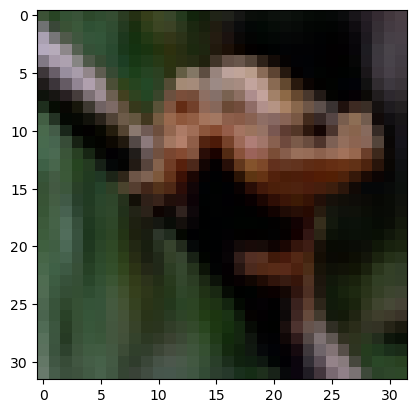

In [21]:
plt.imshow(X_train[5000])
plt.show()

In [5]:
X_train.dtype

dtype('uint8')

In [10]:
for x in X_train[0]:
    for i in x:
        for j in i:
            print('{:3d}'.format(j), end='')
    print()

 59 62 63 43 46 45 50 48 43 68 54 42 98 73 52119 91 63139107 75145110 80149117 89149120 93131103 77125 99 76142115 91144112 86137105 79129 97 71137106 79134106 76124 97 64139113 78139112 75133105 69136105 74139108 77152120 89163131100168136108159129102158130104158132108152125102148124103
 16 20 20  0  0  0 18  8  0 51 27  8 88 51 21120 82 43128 89 45127 86 44126 87 50116 79 44106 70 37101 67 35105 70 36113 74 35109 70 33112 72 37119 79 44109 71 33105 69 27125 89 46127 92 46122 85 39131 89 47124 82 41121 79 37131 89 48132 91 53133 94 58133 96 60123 88 55119 83 50122 87 57
 25 24 21 16  7  0 49 27  8 83 50 23110 72 41129 92 54130 93 55121 82 47113 77 43112 78 44112 79 46106 75 45105 73 38128 92 48124 87 47130 92 56127 89 56122 85 51115 79 43120 85 47130 95 54131 96 55139102 62127 90 51126 89 49127 89 50130 92 53142105 68130 94 58118 84 50120 84 50109 73 42
 33 25 17 38 20  4 87 54 25106 63 28115 70 33117 74 35114 72 37105 62 33107 68 33121 84 45125 90 53109 75 40113 77 38146105 58133 91 

In [11]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(32, 32, 3),activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

path = 'data/model/all/mnist.hdf5'
checkpoint = ModelCheckpoint(path, monitor='val_loss', verbose=0, save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=10)


Epoch 1/1000
75/75 [==============================] - 56s 735ms/step - loss: 1.8884 - accuracy: 0.3095 - val_loss: 1.5372 - val_accuracy: 0.4621
Epoch 2/1000
75/75 [==============================] - 60s 796ms/step - loss: 1.5539 - accuracy: 0.4378 - val_loss: 1.3893 - val_accuracy: 0.5137
Epoch 3/1000
75/75 [==============================] - 58s 775ms/step - loss: 1.4172 - accuracy: 0.4911 - val_loss: 1.2734 - val_accuracy: 0.5565
Epoch 4/1000
75/75 [==============================] - 55s 735ms/step - loss: 1.3206 - accuracy: 0.5274 - val_loss: 1.1801 - val_accuracy: 0.5838
Epoch 5/1000
75/75 [==============================] - 55s 727ms/step - loss: 1.2516 - accuracy: 0.5560 - val_loss: 1.1758 - val_accuracy: 0.5907
Epoch 6/1000
75/75 [==============================] - 54s 727ms/step - loss: 1.1846 - accuracy: 0.5800 - val_loss: 1.0801 - val_accuracy: 0.6259
Epoch 7/1000
75/75 [==============================] - 54s 725ms/step - loss: 1.1351 - accuracy: 0.5943 - val_loss: 1.0651 - val_ac

In [17]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=500,callbacks=[checkpoint,earlystop])


Epoch 1/1000
75/75 [==============================] - 54s 716ms/step - loss: 0.5203 - accuracy: 0.8036 - val_loss: 0.9730 - val_accuracy: 0.6940
Epoch 2/1000
75/75 [==============================] - 53s 706ms/step - loss: 0.5111 - accuracy: 0.8078 - val_loss: 1.0049 - val_accuracy: 0.6920
Epoch 3/1000
75/75 [==============================] - 53s 705ms/step - loss: 0.5026 - accuracy: 0.8121 - val_loss: 1.0189 - val_accuracy: 0.6903
Epoch 4/1000
75/75 [==============================] - 53s 703ms/step - loss: 0.4937 - accuracy: 0.8154 - val_loss: 1.0251 - val_accuracy: 0.6845
Epoch 5/1000
75/75 [==============================] - 53s 705ms/step - loss: 0.4972 - accuracy: 0.8139 - val_loss: 1.0163 - val_accuracy: 0.6907
Epoch 6/1000
75/75 [==============================] - 53s 704ms/step - loss: 0.4836 - accuracy: 0.8158 - val_loss: 1.0249 - val_accuracy: 0.6915
Epoch 7/1000
75/75 [==============================] - 53s 706ms/step - loss: 0.4740 - accuracy: 0.8202 - val_loss: 1.0202 - val_ac

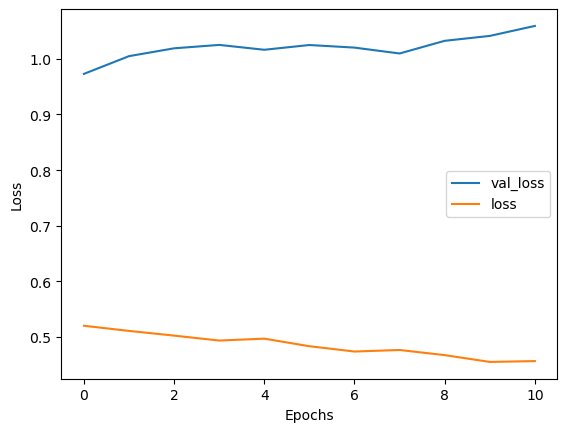

In [18]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = len(y_loss)

plt.plot(range(x_len), y_vloss, label='val_loss')
plt.plot(range(x_len), y_loss, label='loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()